In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('.././creditcard.csv', sep=',')
print(len(df.index))

df = df[:25000]
df.head()

284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
df_corr = df[df.columns[~df.columns.isin(['Time', 'Class'])]]
df_corr.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [18]:
# Z-statistic transform
from sklearn.preprocessing import StandardScaler

# Replace empty values
df_corr = df_corr.replace(np.nan, 0, regex=True)
Z = StandardScaler().fit_transform(df_corr)

mean_vec = np.mean(Z, axis=0)
cov_matrix = (Z - mean_vec).T.dot((Z - mean_vec)) / (Z.shape[0]-1)
cov_matrix = np.cov(Z.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

eig_vals

array([3.16072618, 2.22636375, 1.80841088, 0.01895215, 0.20854645,
       1.50236131, 0.34868628, 1.37525287, 1.34998007, 0.50396843,
       0.51322958, 0.57302163, 0.56406682, 1.21028356, 1.13745937,
       1.10425772, 0.68691069, 0.70736207, 1.0677506 , 1.04300202,
       0.76053914, 0.98639988, 0.96784834, 0.94168608, 0.91107639,
       0.79940671, 0.86117689, 0.82901536, 0.83341879])

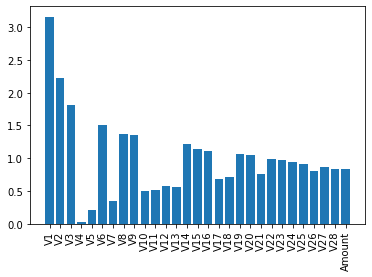

In [22]:
plt.bar(list(df_corr.columns), eig_vals)
plt.xticks(rotation=90)
plt.show()